In [1]:
import os
os.environ['KERAS_BACKEND'] = 'plaidml.keras.backend'

# import keras
from keras import backend

Using plaidml.keras.backend backend.


In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 # number of words to consider as features
maxlen = 500 # cut off texts after this many words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let's train a simple RNN using **Embedding** layer and a **LSTM** layer.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 101s 5ms/sample - loss: 0.4966 - acc: 0.7661 - val_loss: 0.3600 - val_acc: 0.8578
Epoch 2/10
20000/20000 [==============================] - 100s 5ms/sample - loss: 0.2934 - acc: 0.8834 - val_loss: 0.3037 - val_acc: 0.8732
Epoch 3/10
20000/20000 [==============================] - 99s 5ms/sample - loss: 0.2295 - acc: 0.9130 - val_loss: 0.3225 - val_acc: 0.8612
Epoch 4/10
20000/20000 [==============================] - 98s 5ms/sample - loss: 0.1963 - acc: 0.9280 - val_loss: 0.3262 - val_acc: 0.8846
Epoch 5/10
20000/20000 [==============================] - 107s 5ms/sample - loss: 0.1794 - acc: 0.9344 - val_loss: 0.3101 - val_acc: 0.8830
Epoch 6/10
20000/20000 [==============================] - 101s 5ms/sample - loss: 0.1635 - acc: 0.9413 - val_loss: 0.3084 - val_acc: 0.8918
Epoch 7/10
20000/20000 [==============================] - 98s 5ms/sample - loss: 0.1437 - acc: 0.9500 - val_loss:

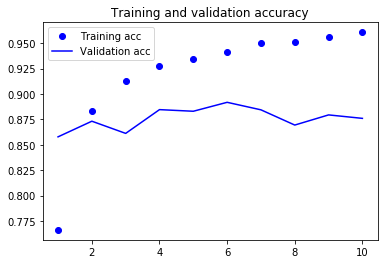

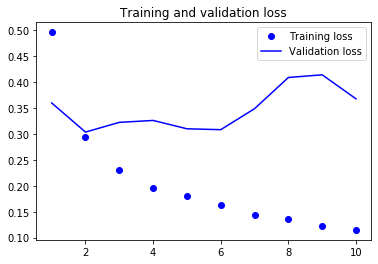

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()